In [75]:
# Importing dependencies
import os
import pandas as pd
import re
import matplotlib.pyplot as plt

In [53]:
# Loading the csv-files and checking shape
data = pd.read_csv(os.path.join('data','preprocessed_data_medium.csv'), index_col=0)
print(data.shape)
data

(569375, 5)


/tmp/ipykernel_153/2835612912.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join('data','preprocessed_data_medium.csv'), index_col=0)


,document,sub_reddit,date,type,language
0,"Ya pomniu etogo ""diktatora"" I ivo rech....day ...",ukraina,2022-03-23,submission,hr
1,"""Why Russians should take collective responsib...",ukraina,2022-03-23,submission,en
2,Reach out to russians and inform them about wa...,ukraina,2022-03-23,submission,en
3,"March 23, 2022: UA Air Force destroyed 7 Russi...",ukraina,2022-03-23,submission,en
4,Zelenskyy addresses in English: “I ask you to ...,ukraina,2022-03-23,submission,en
...,...,...,...,...,...
450184,It's on the home page articles today,geopolitics,2022-03-07,comment,en
450185,It really is wild to see him so badly miscalcu...,geopolitics,2022-03-07,comment,en
450186,panic fear and being cut off from swift \nrus...,geopolitics,2022-03-07,comment,en
450187,Post a [submission statement](https://www.redd...,geopolitics,2022-03-07,comment,en


In [8]:

# Loading the csv-files and checking shape
data_pkl = pd.read_pickle(os.path.join('data','preprocessed_data_medium.pkl'))
print(data_pkl.shape)
data_pkl

(422567, 5)


,document,sub_reddit,date,type,language
0,"Ya pomniu etogo ""diktatora"" I ivo rech....day ...",ukraina,2022-03-23,submission,hr
1,"""Why Russians should take collective responsib...",ukraina,2022-03-23,submission,en
2,Reach out to russians and inform them about wa...,ukraina,2022-03-23,submission,en
3,"March 23, 2022: UA Air Force destroyed 7 Russi...",ukraina,2022-03-23,submission,en
4,Zelenskyy addresses in English: “I ask you to ...,ukraina,2022-03-23,submission,en
...,...,...,...,...,...
450184,It's on the home page articles today,geopolitics,2022-03-07,comment,en
450185,It really is wild to see him so badly miscalcu...,geopolitics,2022-03-07,comment,en
450186,panic fear and being cut off from swift \nrus...,geopolitics,2022-03-07,comment,en
450187,Post a [submission statement](https://www.redd...,geopolitics,2022-03-07,comment,en


### Summary statistics

In [209]:
from statistics import mean
import numpy as np
outpath = os.path.join("plots")

In [222]:
# summary stats for document length
#temp = data[data['document'].apply(lambda x: isinstance(x, str))]
#temp["doc_length"] = temp["document"].apply(len)
x = temp["doc_length"][temp["doc_length"].between(temp["doc_length"].quantile(0), temp["doc_length"].quantile(.999))]
x.describe()
#temp["doc_length"].describe()

count    568798.000000
mean        129.707132
std         190.253805
min           1.000000
25%          38.000000
50%          57.000000
75%         145.000000
max        2515.000000
Name: doc_length, dtype: float64

In [223]:
test = temp[temp.doc_length == 2515]
test

,document,sub_reddit,date,type,language,doc_length
15765,"Dunno, I just read a report that most multinat...",geopolitics,2022-03-23,comment,en,2515


In [13]:
# get overall number of submissions and comments
data["type"].value_counts()

comment       408023
submission     14536
en                 7
uk                 1
Name: type, dtype: int64

In [ ]:
# get number of submissions and comments per subreddit
data.groupby("sub_reddit")["type"].value_counts()

#### Volume

In [78]:
# plot volume per day
volume = data["date"].value_counts()
volume.plot()

In [ ]:
fig = plt.figure()
ax = plt.subplot()

ax.plot(volume_sr)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1, fancybox=True, shadow=True)

plt.show()

#plt.savefig('test_plot.png')



In [292]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()
ts

2000-01-01     0.733243
2000-01-02     1.541605
2000-01-03     2.002152
2000-01-04     2.061152
2000-01-05     2.659056
                ...    
2002-09-22     8.521842
2002-09-23     7.749336
2002-09-24     9.343637
2002-09-25    11.896053
2002-09-26    11.931760
Freq: D, Length: 1000, dtype: float64

In [293]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))

df = df.cumsum()


,A,B,C,D
2000-01-01,0.129264,-0.559524,-2.890608,0.801005
2000-01-02,-0.964704,-0.559524,-1.593942,0.062825
2000-01-03,-1.781866,-1.408951,-1.348704,-0.292849
2000-01-04,-1.346378,-1.537765,0.019041,0.329221
2000-01-05,-1.194304,-1.835581,-0.931429,-0.092925
...,...,...,...,...
2002-09-22,-27.169312,-46.896544,17.202451,32.515462
2002-09-23,-28.486888,-47.504211,18.695332,32.328464
2002-09-24,-27.412477,-48.031846,18.886765,33.126617
2002-09-25,-27.889632,-46.556515,19.059540,32.217858


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


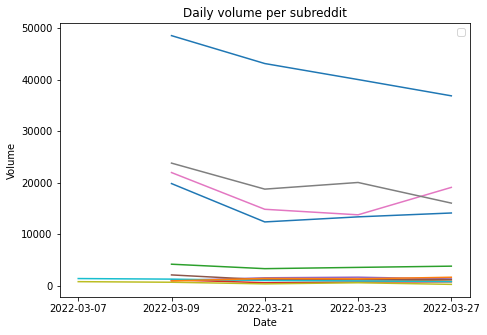

In [312]:
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.95,0.95]) # axis starts at 0.1, 0.1
ax.set_title("Daily volume per subreddit")
ax.set_xlabel("Date")
ax.set_ylabel("Volume")
ax.plot(volume_sr)
#fig.legend(ax.get_ylabel(), loc='upper right')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
plt.legend()
plt.show()
fig.savefig("fig.png")

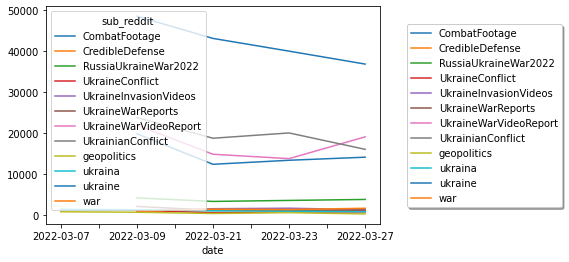

In [318]:
# plot volume per day by subreddit
vol_temp = data[data.date != "comment"] # hopefully not necessary when we have the final data
volume_sr = vol_temp.groupby("sub_reddit")["date"].value_counts()
volume_sr = volume_sr.unstack(level=[1]).T
outfile = os.path.join(outpath, "sr_volume.png")
sr_figure = volume_sr.plot().figure
sr_figure.legend(loc='center left', bbox_to_anchor=(0.95, 0.5), fancybox=True, shadow=True)
sr_figure.savefig(outfile)

In [313]:
volume_sr

sub_reddit,CombatFootage,CredibleDefense,RussiaUkraineWar2022,UkraineConflict,UkraineInvasionVideos,UkraineWarReports,UkraineWarVideoReport,UkrainianConflict,geopolitics,ukraina,ukraine,war
date,,,,,,,,,,,,
2022-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,762.0,1365.0,NaN,NaN
2022-03-09,19828.0,954.0,4154.0,1115.0,981.0,2071.0,21969.0,23803.0,648.0,1254.0,48582.0,919.0
2022-03-21,12373.0,1142.0,3289.0,557.0,1513.0,1125.0,14830.0,18747.0,333.0,992.0,43159.0,1382.0
2022-03-23,13358.0,1228.0,3536.0,689.0,1630.0,1123.0,13755.0,20040.0,550.0,903.0,40047.0,1298.0
2022-03-27,14109.0,864.0,3775.0,738.0,1290.0,1155.0,19085.0,16030.0,236.0,770.0,36882.0,1621.0


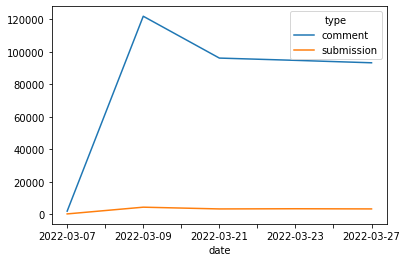

In [195]:
# plot volume per day by type
volume_t = vol_temp.groupby("type")["date"].value_counts()
volume_t = volume_t.unstack(level=[1]).T
outfile = os.path.join(outpath, "type_volume.png")
volume_t.plot().figure.savefig(outfile)


#### Subreddits

In [ ]:
# plot number of entries per subreddit
sr_plot = data["sub_reddit"].value_counts().plot.bar()
#data.loc[data["sub_reddit"] == "2022-03-21"]
outfile = os.path.join(outpath, "subreddit_count.png")
sr_plot.figure.savefig(outfile)

In [ ]:
# plot number of posts per language by subreddit
sr_lang = data.groupby("sub_reddit")["language"].value_counts()
print(sr_lang)
sr_lang = sr_lang.unstack(level=[1])
lang_plot = sr_lang.plot.bar()
outfile = os.path.join(outpath, "subreddit_language.png")
lang_plot.figure.savefig(outfile)


In [257]:
doc_len = temp.groupby("sub_reddit")["doc_length"].describe()

,count,mean,std,min,25%,50%,75%,max
sub_reddit,,,,,,,,
2022-03-09,1.0,13.000000,NaN,13.0,13.0,13.0,13.00,13.0
2022-03-21,3.0,10.333333,5.773503,7.0,7.0,7.0,12.00,17.0
2022-03-23,1.0,21.000000,NaN,21.0,21.0,21.0,21.00,21.0
2022-03-27,3.0,13.666667,7.023769,7.0,10.0,13.0,17.00,21.0
CombatFootage,59668.0,161.526899,234.350826,1.0,45.0,93.0,189.00,8017.0
CredibleDefense,4188.0,352.592884,497.764722,2.0,105.0,209.0,415.25,8475.0
RussiaUkraineWar2022,14754.0,171.245493,261.226957,1.0,39.0,84.0,196.00,8824.0
UkraineConflict,3099.0,164.953211,261.124848,1.0,44.0,86.0,187.00,3838.0
UkraineInvasionVideos,5414.0,119.349095,220.167043,1.0,34.0,68.0,134.00,7950.0


#### Language

In [ ]:
# get number of entries per language
print(data["language"].value_counts())
#data["language"].value_counts().plot.bar()

In [ ]:
# get table of language percentages across subreddits
en_ru_uk = sr_lang[["en","ru","uk"]]
x = data["sub_reddit"].value_counts()
df = pd.concat([en_ru_uk, x.rename("total")], axis=1)

# find percentages
en_ru_uk['en_percent'] = df['en'] / df['total'] * 100
en_ru_uk['ru_percent'] = df['ru'] / df['total'] * 100
en_ru_uk['uk_percent'] = df['uk'] / df['total'] * 100

# round decimals
en_ru_uk.round(decimals = 2)